# Titanic Data Set

The Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.The data has been split into two groups:

-training set (train.csv)
-test set (test.csv)

**The training set** should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

**The test set** should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

## Data Dictionary

| Variable | Definiition | Key |
| --- | --- | --- |
| survival | Survival |0= No, 1= Yes |
| pclass | Ticket class |1=1st, 2= 2nd , 3=3rd |
| sex | Sex |
| Age | Age in years |
| Sibsp | # of s1blings, spouses aboard the Titanic |
| parch | # of parents/children aboard the Titanic |
| ticket | Ticket number |
| fare | Fare |
| cabin | Cabin number |
| Embarked | Port of Embarkation|C= Cherbourg,Q=Queenstown,S=Southampton|


In [464]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor

from sklearn.metrics import accuracy_score, log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_validate , cross_val_score ,cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import tree


In [405]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [406]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [407]:
train_data.shape, test_data.shape

((891, 12), (418, 11))

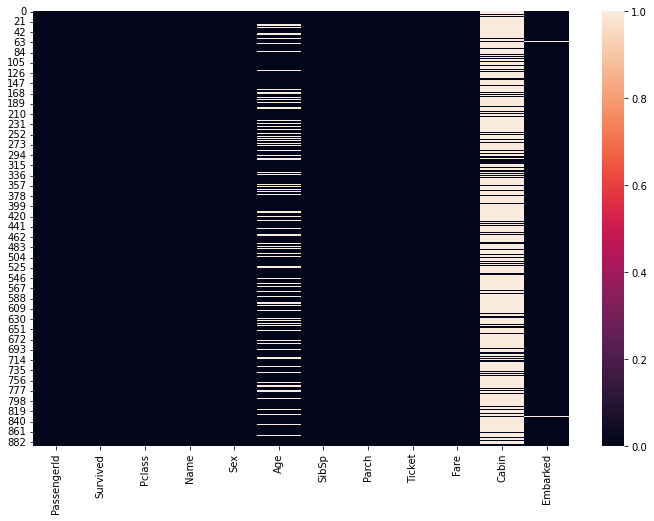

In [408]:
# Check missing values in training data  via heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(train_data.isna())
plt.show()

Training Data
- There are blanks in Age Column
- Cabin has 204 entries
- 2 missing entries in Embarked column

Test Data
- There are blanks in Age Column
- Cabin has 91 entries



In [409]:
train_data.nunique()


PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

- Names are all unique. Not a valuable feature for the algorithm.
- There are some missing values for Cabin. This feature can be dropped as there are lot of missing values.
- Ticket is also not useful for analysis. 


In [410]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- 38% of passengers in training set survived the accident.
- More than 50% of passengers have more than 29yrs of age.


- Test data has 1 row with null value in Fare. Lets drop this row.

In [411]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Dropping Columns

In [412]:
# drop unwanted columns
train_data.drop(['PassengerId','Ticket', 'Cabin','Name','Embarked','Fare'], axis=1, inplace=True)
test_data.drop(['Ticket', 'Cabin','Name','Embarked','Fare'], axis=1, inplace=True)



### Feature Mapping

In [413]:
train_data['Sex'] = train_data['Sex'].map({'female':0,'male':1})
test_data['Sex'] = test_data['Sex'].map({'female':0,'male':1})



Age is one of the important features in the dataset. We can't just delete or drop Age column as this may be important impact on if the passenger survived or not.

In [414]:
train_data.groupby(['Pclass','Sex','Survived'])['Age'].mean()

Pclass  Sex  Survived
1       0    0           25.666667
             1           34.939024
        1    0           44.581967
             1           36.248000
2       0    0           36.000000
             1           28.080882
        1    0           33.369048
             1           16.022000
3       0    0           23.818182
             1           19.329787
        1    0           27.255814
             1           22.274211
Name: Age, dtype: float64

In [415]:
#Fill mean of age for null values
train_data['Age']=train_data['Age'].fillna(train_data.groupby(['Pclass', 'Sex'])['Age'].transform('mean'))
test_data['Age']=test_data['Age'].fillna(test_data.groupby(['Pclass', 'Sex'])['Age'].transform('mean'))

In [416]:
# Check missing values via heatmap
#plt.figure(figsize=(12, 8))
#sns.heatmap(train_data.isna())
#plt.show()
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
dtype: int64

Text(0.5, 1.0, 'Survived vs Sex')

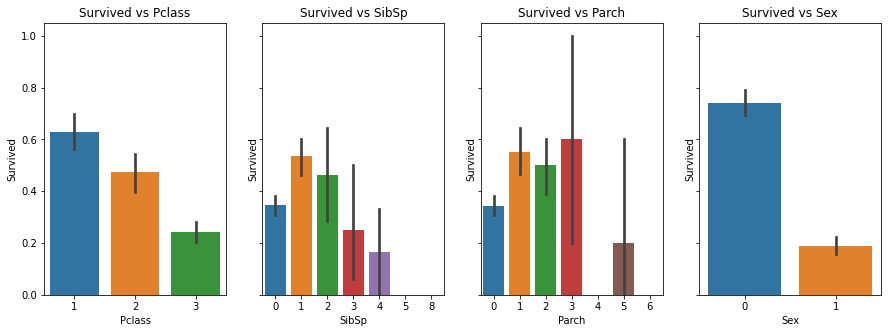

In [417]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=True)
sns.barplot(ax=axes[0],x='Pclass', y='Survived', data=train_data)
axes[0].set_title('Survived vs Pclass')

sns.barplot(ax=axes[1],x='SibSp', y='Survived', data=train_data)
axes[1].set_title('Survived vs SibSp')

sns.barplot(ax=axes[2],x='Parch', y='Survived', data=train_data)
axes[2].set_title('Survived vs Parch')

sns.barplot(ax=axes[3],x='Sex', y='Survived', data=train_data)
axes[3].set_title('Survived vs Sex')


- Females have high probability of survival compared to Men
- Passengers in first class (Pclass = 1) have higher chance of survival compared to other classes
- There is a high chance of surival of family more than 2.

In [418]:
# However we want to see correlation in graphical representation so below is function for that
def plot_corr(data, size=11):
    corr = data.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')


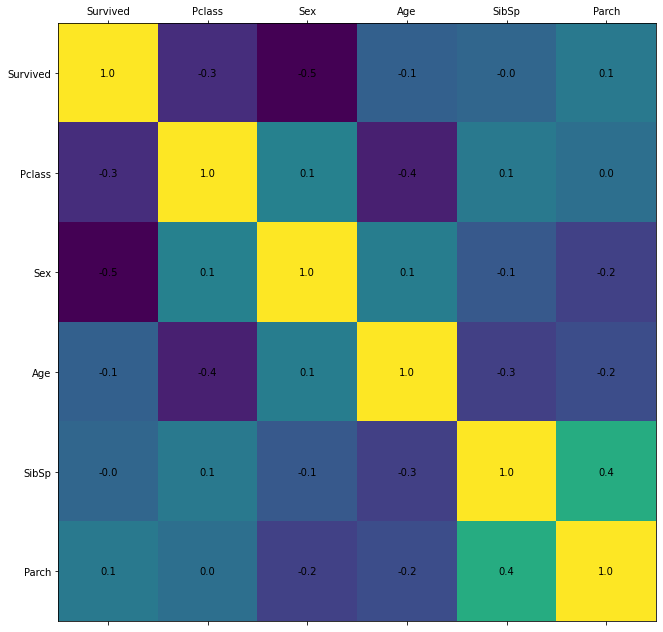

In [419]:
plot_corr(train_data)

## Building Machine Learning Models

In [438]:
y=train_data['Survived']
X=train_data.drop(['Survived'],axis=1)

X_tst = test_data.drop(['PassengerId'],axis=1)





In [429]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


## Building Decision Tree Model

In [458]:
##  Function to calculate r2_score and RMSE on train and test data
def get_model_score(model, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_r2=metrics.r2_score(y_train,pred_train)
    test_r2=metrics.r2_score(y_test,pred_test)
    train_rmse=np.sqrt(metrics.mean_squared_error(y_train,pred_train))
    test_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_test))
    
    #Adding all scores in the list
    score_list.extend((train_r2,test_r2,train_rmse,test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag==True: 
        print("R-sqaure on training set : ",metrics.r2_score(y_train,pred_train))
        print("R-square on test set : ",metrics.r2_score(y_test,pred_test))
        print("RMSE on training set : ",np.sqrt(metrics.mean_squared_error(y_train,pred_train)))
        print("RMSE on test set : ",np.sqrt(metrics.mean_squared_error(y_test,pred_test)))
    
    # returning the list with train and test scores
    return score_list

In [461]:
dtree=DecisionTreeRegressor(random_state=1)
dtree.fit(X_train,y_train)

DecisionTreeRegressor(random_state=1)

### Scoring Decision Tree

In [462]:
dtree_score=get_model_score(dtree)

R-sqaure on training set :  0.7807749465188911
R-square on test set :  0.08116901988256653
RMSE on training set :  0.22636596050061955
RMSE on test set :  0.47087479734741944


In [465]:
# Choose the type of classifier. 
dtree_tuned = DecisionTreeRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': list(np.arange(2,20)) + [None], 
              'min_samples_leaf': [1, 3, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10, 15] + [None],
              'min_impurity_decrease': [0.001, 0.01, 0.1, 0.0]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_impurity_decrease=0.001,
                      min_samples_leaf=3, random_state=1)

In [467]:
dtree_tuned_score=get_model_score(dtree_tuned)

R-sqaure on training set :  0.47857171320325786
R-square on test set :  0.39335604097193455
RMSE on training set :  0.3491108305710104
RMSE on test set :  0.38260846120158354


**Plotting the feature importance of each variable**

In [468]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

             Imp
Sex     0.581148
Pclass  0.222827
Age     0.155491
SibSp   0.040534
Parch   0.000000


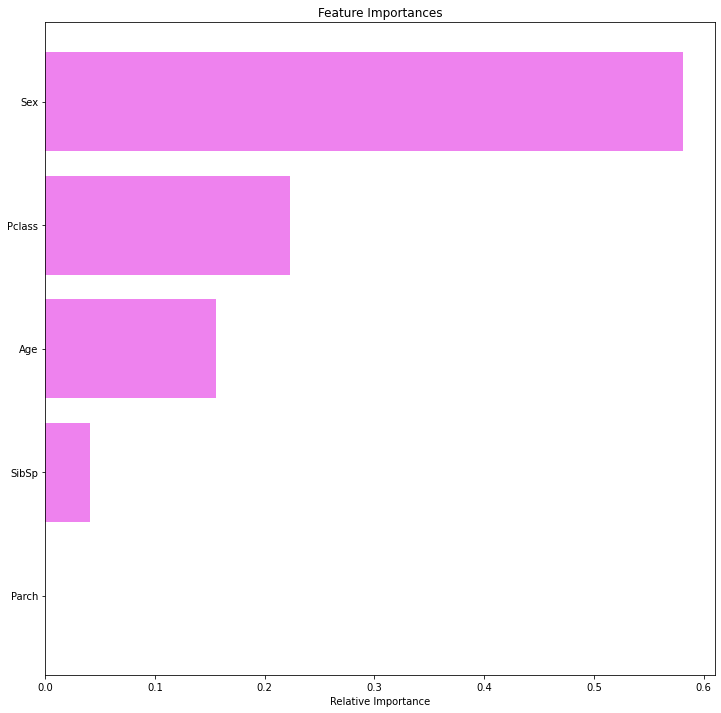

In [469]:
feature_names = X_train.columns
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Random Forest Model

RF Accuracy: 83.05%
The cross validated score for Random forest is: 81.04


Text(0.5, 1.05, 'Confusion_matrix for RF')

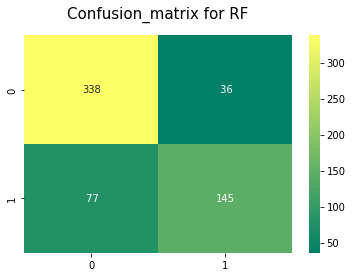

In [485]:
##Random forest
rf_clf = RandomForestClassifier(criterion='entropy', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf_clf.fit(X_train,  y_train)
print("RF Accuracy: "+repr(round(rf_clf.score(X_test, y_test) * 100, 2)) + "%")
result_rf=cross_val_score(rf_clf,X_train,y_train,cv=10,scoring='accuracy')
print('The cross validated score for Random forest is:',round(result_rf.mean()*100,2))
y_pred = cross_val_predict(rf_clf,X_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix for RF', y=1.05, size=15)

In [486]:
get_model_score(rf_clf)

R-sqaure on training set :  0.5477670183552537
R-square on test set :  0.29761904761904767
RMSE on training set :  0.3251225891668821
RMSE on test set :  0.41169348479630913


[0.5477670183552537,
 0.29761904761904767,
 0.3251225891668821,
 0.41169348479630913]

In [487]:
ans = rf_clf.predict(X_tst)
submission = pd.DataFrame({"PassengerId": test_data['PassengerId'],
                           "Survived": ans}
                          )
display(submission)
submission.to_csv('gender_submission.csv', index=False)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
